In [1]:
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos.
import pandas as pd
import os
from pathlib import Path

# **Anime recommendation**

## **Carga de datos**

In [2]:
#Anime.csv
path = Path(os.getcwd())
path = str(path.parent.absolute())
path = path+"/datos/anime.csv"
dfAnime = pd.read_csv(path,na_values='?')    
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [25]:
#rating.csv
path2 = Path(os.getcwd())
path2 = str(path2.parent.absolute())
path2 = path2+"/datos/rating.csv"
dfRating = pd.read_csv(path2,na_values='?')    
dfRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## **Tipos de dato adecuados**

In [26]:
#anime.csv
dfAnime['name'] = dfAnime['name'].astype("string")
dfAnime['genre'] = dfAnime['genre'].astype("string")
dfAnime['type'] = dfAnime['type'].astype("string")
dfAnime['episodes']=pd.to_numeric(dfAnime.episodes, errors='coerce').dropna().astype(int)
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  string 
 2   genre     11830 non-null  string 
 3   type      11830 non-null  string 
 4   episodes  11830 non-null  int32  
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int32(1), int64(2), string(3)
memory usage: 693.2 KB


 **rating.csv ya tenia los tipos de datos adecuados**

## **Busqueda y eliminacion de valores nulos o duplicados**

### anime.csv

In [27]:
nullValues = []

for i in range(len(dfAnime)):
    if(dfAnime.iloc[i].isnull().sum() != 0):
        nullValues.append(i)
print("Se encontraron ",len(nullValues)," valores nulos")
#La cantidad de datos con valores nulos no es tan grande en comparacion asi que podemos borrarlos
#Unknown es contado como nulo porque no podemos asumir la cantidad de episodios de un anime en base a otros

Se encontraron  0  valores nulos


In [28]:
dfAnime=dfAnime.drop(nullValues)
dfAnime['episodes'] = dfAnime['episodes'].astype(int)
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  string 
 2   genre     11830 non-null  string 
 3   type      11830 non-null  string 
 4   episodes  11830 non-null  int32  
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int32(1), int64(2), string(3)
memory usage: 693.2 KB


In [29]:
duplicados = dfAnime[dfAnime.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  0


In [30]:
#Convirtamos type en una variable de numeros enteros para poder usar histogramas a futuro
dfAnime=dfAnime.replace({'Movie': '0', 'TV': '1','OVA':'2','ONA':'2','Special':'3','Music':'4'})
dfAnime['type'] = dfAnime['type'].astype(int)

In [9]:
dfAnime.head(5)

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre  type  episodes  rating  \
0               Drama, Romance, School, Supernatural     0         1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     1        64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     1        51    9.25   
3                                   Sci-Fi, Thriller     1        24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     1        51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

### rating.csv

In [10]:
print("La cantidad de datos nulos es:")
dfRating.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

La cantidad de datos nulos es:


In [11]:
#Eliminamos los -1 porque indican cuando no se califico un anime y siendo asi entonces no nos sirve
dfRating = dfRating[dfRating.rating != -1]

In [12]:
duplicados = dfRating[dfRating.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  1


In [13]:
dfRating.drop_duplicates(keep='first',inplace=True)
duplicados = dfRating[dfRating.duplicated()].shape[0]
print("Numero de datos duplicados ",duplicados)

Numero de datos duplicados  0


In [14]:
dfRating.head(5)

user_id  anime_id  rating
47         1      8074      10
81         1     11617      10
83         1     11757      10
101        1     15451      10
153        2     11771      10

In [15]:
dfRating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337240 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


## **Histogramas**

array([[<AxesSubplot:title={'center':'type'}>]], dtype=object)

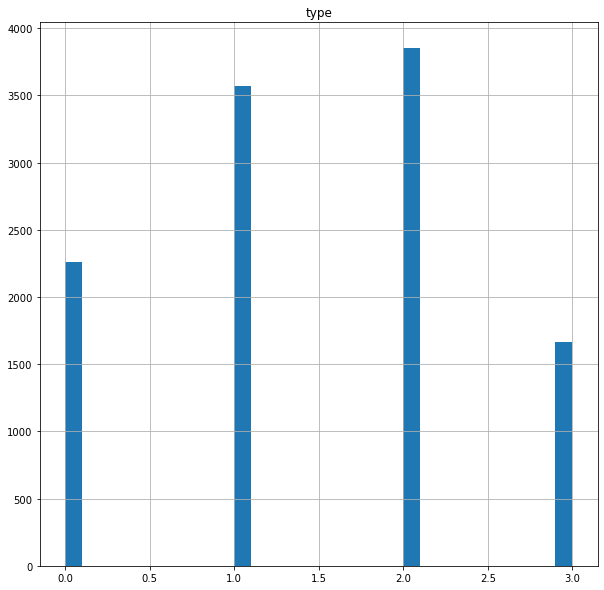

In [16]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'type'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[0, 3], bins=num_bins, figsize=(10,10))  #Histograma.

+ Observamos que aquellos tipos de anime que mas aparecen son "TV" y "OVA"

array([[<AxesSubplot:title={'center':'episodes'}>]], dtype=object)

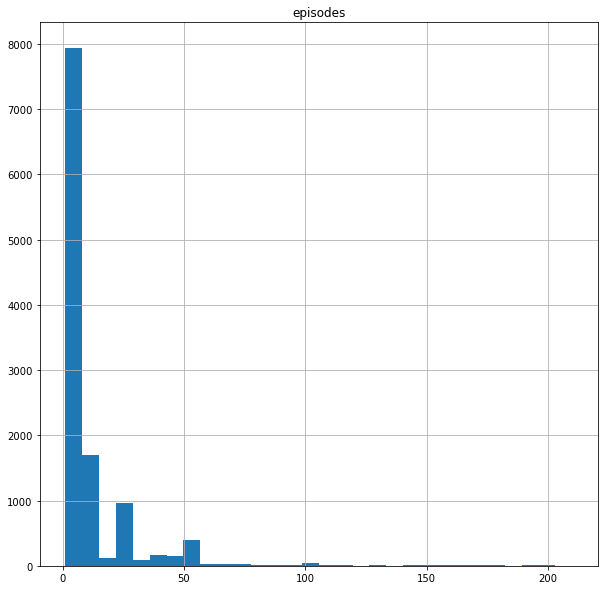

In [17]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'episodes'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[1, 210], bins=num_bins, figsize=(10,10))  #Histograma.

+ Como se puede observar hay una gran cantidad de valores en 1, esto es debido a que muchos de los animes son peliculas u ovas por lo que solo cuentan con un episodio tecnicamente

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

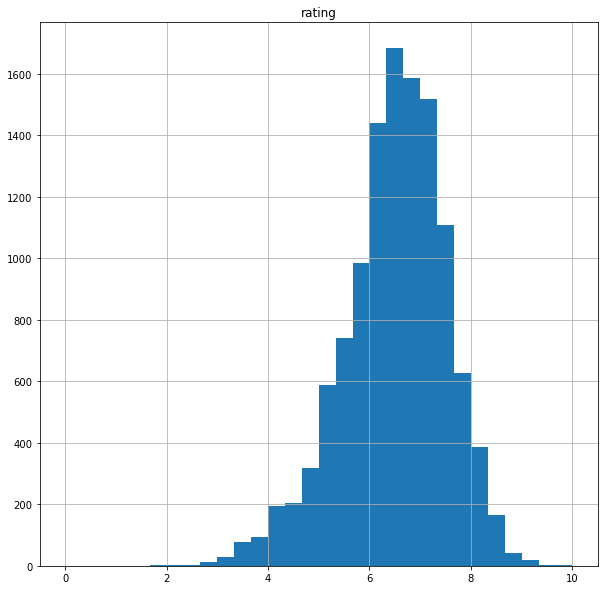

In [18]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'rating'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[0, 10], bins=num_bins, figsize=(10,10))  #Histograma.

+ Entre 6 y 7 estan la mayoria de ratings

array([[<AxesSubplot:title={'center':'members'}>]], dtype=object)

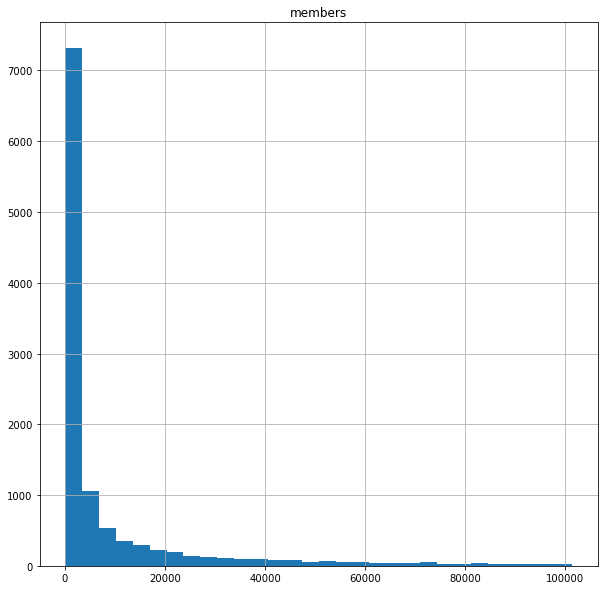

In [19]:
#Generemos algunas gráficas directamente desde pandas.
atr = 'members'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[5, 101397], bins=num_bins, figsize=(10,10))
#El rango es demasiado amplio, debemos disminuir el rango

array([[<AxesSubplot:title={'center':'members'}>]], dtype=object)

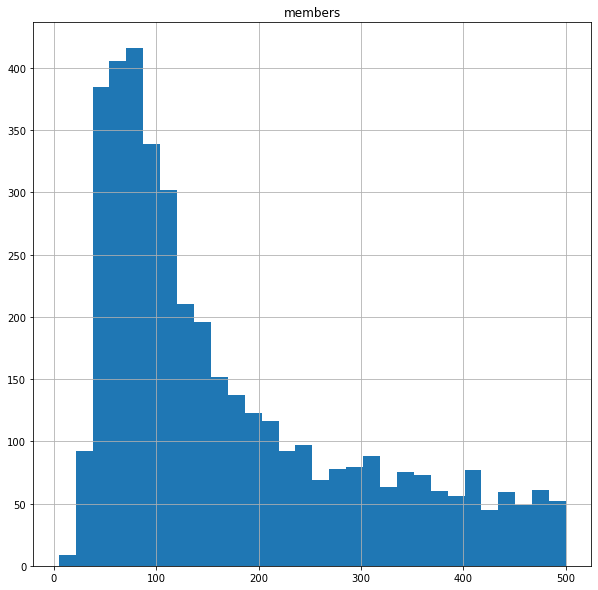

In [20]:
atr = 'members'
num_bins = 30 #Número de columnas del histograma
dfAnime.hist(column=atr,range=[5, 500], bins=num_bins, figsize=(10,10))

+ Tener entre 20 y 80 miembros es lo mas comun para la mayoria de animes

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

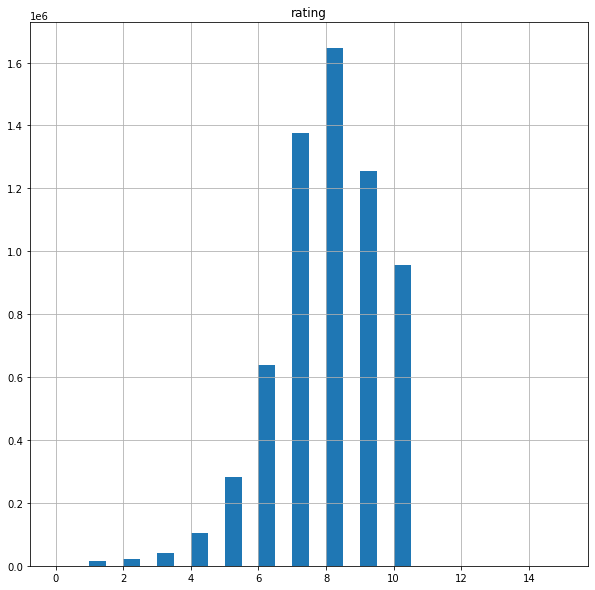

In [21]:
atr = 'rating'
num_bins = 30 #Número de columnas del histograma
dfRating.hist(column=atr,range=[0, 15], bins=num_bins, figsize=(10,10))

+ La mayoria de usuarios puntua 8 a los animes

## **Busqueda y eliminacion de outliers**

In [31]:
df_series = pd.DataFrame()
df_other_content = pd.DataFrame()

for i in range (len(dfAnime)):
    if(dfAnime.iloc[i].type == 1):
        #df_series = pd.concat([df_series, data], ignore_index = True)
        df_series = df_series.append(dfAnime.iloc[i])
    else:
        #df_other_content = pd.concat([df_other_content, data])
        df_other_content = df_other_content.append(dfAnime.iloc[i])

sns.set_theme(style="whitegrid")

C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\930281810.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_other_content = df_other_content.append(dfAnime.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\930281810.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_series = df_series.append(dfAnime.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\930281810.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_series = df_series.append(dfAnime.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\930281810.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_series = df_series.append(dfAnime.iloc[i])
C

In [32]:
series_iqr = df_series.episodes.quantile(0.75) - df_series.episodes.quantile(0.25)
series_lower_bound = df_series.episodes.quantile(0.25) - (1.5 * series_iqr) 
series_upper_bound = df_series.episodes.quantile(0.75) + (1.5 * series_iqr)

other_content_iqr = df_other_content.episodes.quantile(0.75) - df_other_content.episodes.quantile(0.25)
other_content_lower_bound = df_other_content.episodes.quantile(0.25) - (1.5 * other_content_iqr) 
other_content_upper_bound = df_other_content.episodes.quantile(0.75) + (1.5 * other_content_iqr)

In [33]:
#Any data under the lowers bounds or over the upper bounds it's going to be atypical and has to be removed

series_atypicals = []
other_content_atypicals = []

for index in range(len(df_series)):
    data = df_series.iloc[index]


    if(data.episodes < series_lower_bound or data.episodes > series_upper_bound):
        series_atypicals.append(index)        

for index in range(len(df_other_content)):
    data = df_other_content.iloc[index]
    
    if(data.episodes < other_content_lower_bound or data.episodes > other_content_upper_bound):
        other_content_atypicals.append(index)  


In [35]:
depurated_series = pd.DataFrame()
depurated_other_contents = pd.DataFrame()


for i in range(len(df_series)):
    if(not series_atypicals.__contains__(i)):
        #depurated_series = pd.concat([depurated_series, df_series.iloc[i]])
        depurated_series = depurated_series.append(df_series.iloc[i])

for i in range(len(df_other_content)):
    if(not other_content_atypicals.__contains__(i)):
        #depurated_another_content = pd.concat([depurated_other_contents, df_other_content.iloc[i]])
        depurated_other_contents = depurated_other_contents.append(df_other_content.iloc[i])

print("New size of the series dataframe: " , len(depurated_series) , "\n")
print("New size of the other content dataframe: " , len(depurated_other_contents) , "\n")

C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\334598465.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depurated_series = depurated_series.append(df_series.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\334598465.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depurated_series = depurated_series.append(df_series.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\334598465.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depurated_series = depurated_series.append(df_series.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\334598465.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depurated_seri

New size of the series dataframe:  3368 

New size of the other content dataframe:  7142 



C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\334598465.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depurated_other_contents = depurated_other_contents.append(df_other_content.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\334598465.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depurated_other_contents = depurated_other_contents.append(df_other_content.iloc[i])
C:\Users\kesas\AppData\Local\Temp\ipykernel_9560\334598465.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  depurated_other_contents = depurated_other_contents.append(df_other_content.iloc[i])


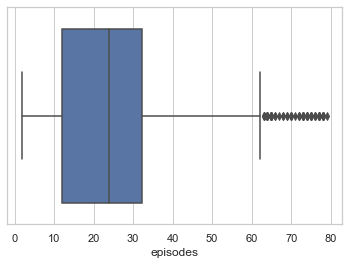

In [48]:
atr = 'episodes'
series = sns.boxplot(x=depurated_series[atr])



# A bug it's ignoring some atypicals so they can't be removed 

7142


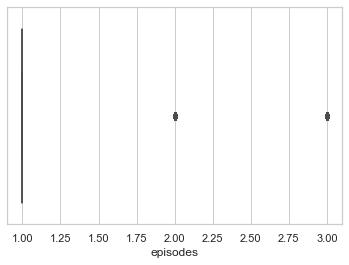

In [50]:
special_productions = sns.boxplot(x=depurated_other_contents[atr])


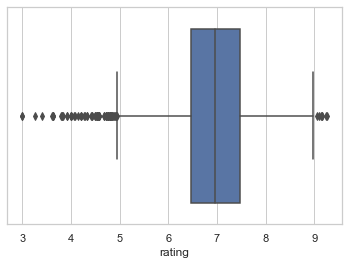

In [47]:
atr = 'rating'
ax = sns.boxplot(x=depurated_series[atr])


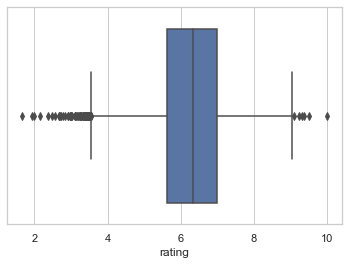

In [46]:
ax = sns.boxplot(x=depurated_other_contents[atr])


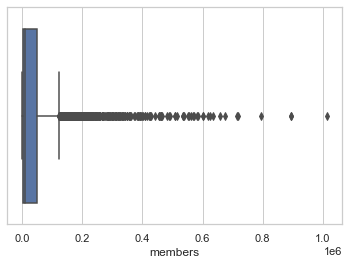

In [52]:
atr = 'members'
ax = sns.boxplot(x=depurated_series[atr])


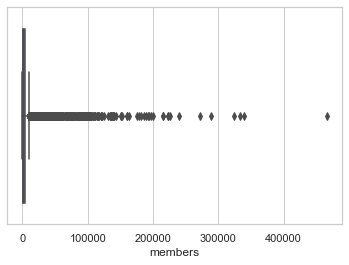

In [53]:
ax = sns.boxplot(x=depurated_other_contents[atr])


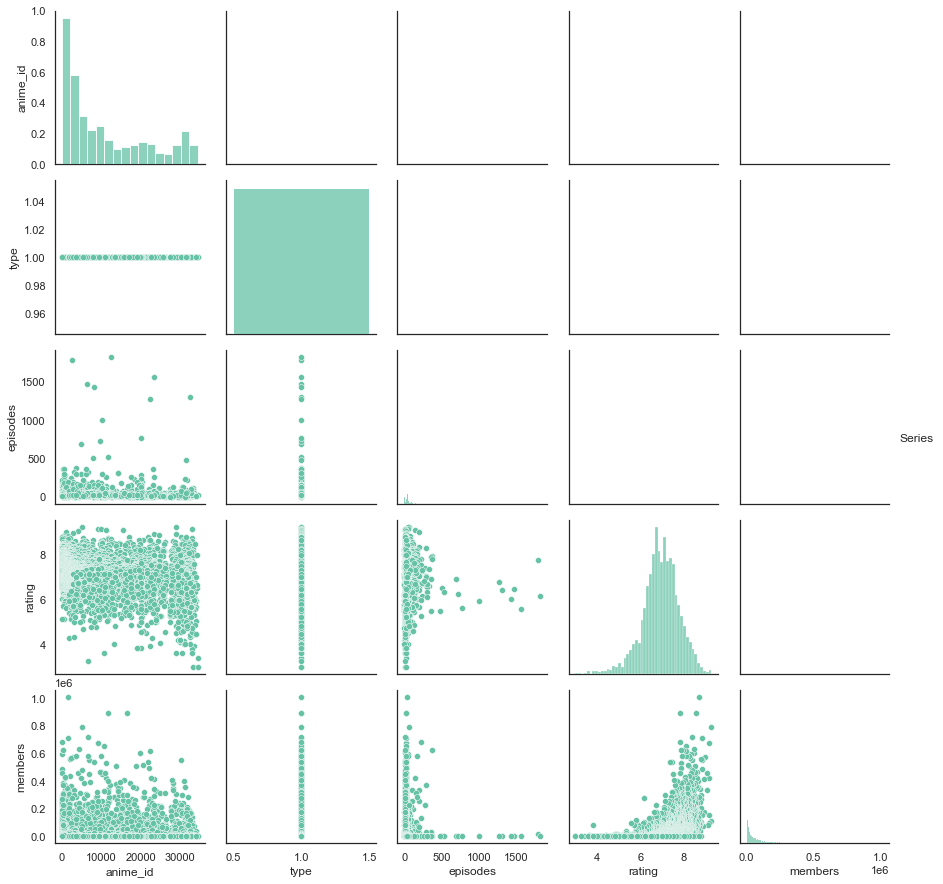

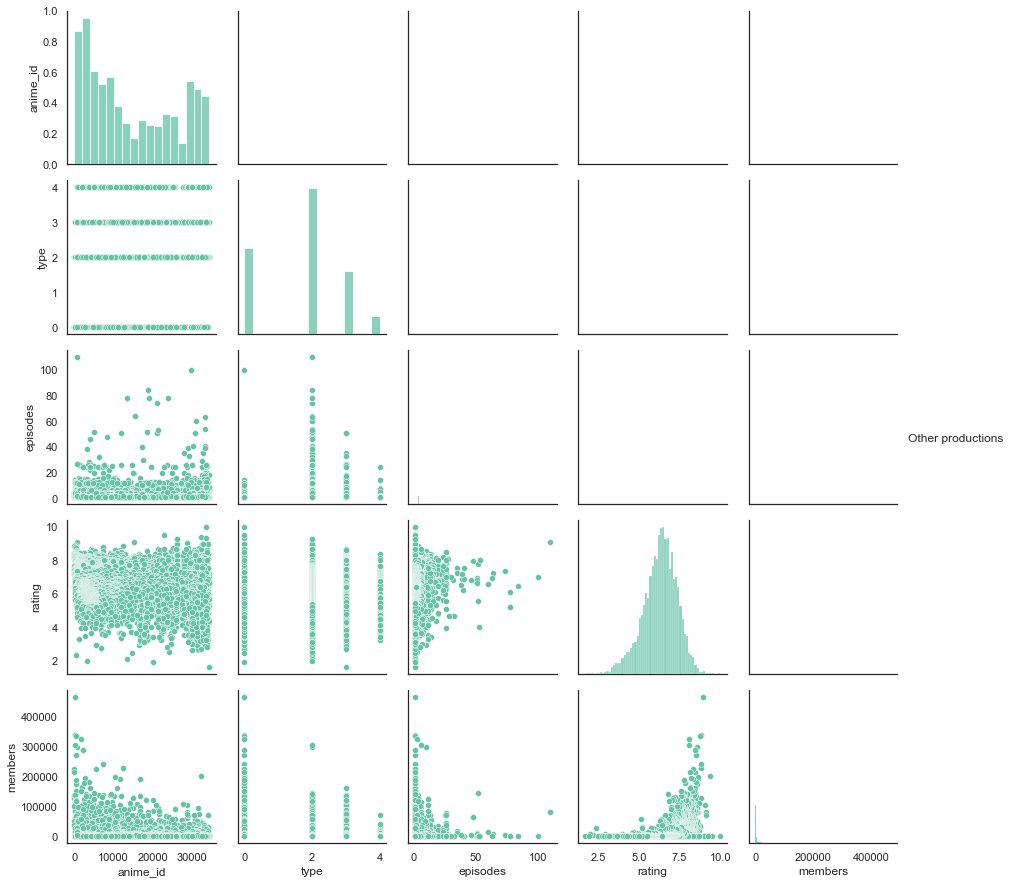

In [54]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_series,diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend(title="Series")

sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_other_content,diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend(title="Other productions")

### Análisis sobre las series:

* Hay poca correlación entre la calificación y la cantidad de episodios de una serie, sin embargo esta parece ser positiva (a mayor número de episodios mejor calificacaión)

* Hay una correlación positiva entre la cantidad de usuarios que han visto una serie y su calificación (a mayor número de usuarios mayor calificación)

* Hay una correlación negativa entre la cantidad de episodios y los usuarios que ven una serie (a mayor número de episodios menos usuarios la ven)

### Análisis sobre las producciones especiales (ovas, películas, especiales):

* Hay poca correlación entre la calificación y la cantidad de episodios de una producción especial, sin embargo esta parece ser positiva (a mayor número de episodios mejor calificacaión)

* Hay una correlación positiva entre la cantidad de usuarios que han visto una producción especial y su calificación (a mayor número de usuarios mayor calificación)

* Hay una correlación negativa entre la cantidad de episodios y los usuarios que ven una producción especial (a mayor número de episodios menos usuarios la ven)

# Fusion de los df

In [55]:
series_Rating_Df = pd.merge(depurated_series,dfRating,on="anime_id",suffixes= [None, "_user"])
series_Rating_Df = series_Rating_Df.rename(columns={"rating_user": "user_rating"})
series_Rating_Df.info()

other_content_Rating_Df = pd.merge(depurated_other_contents,dfRating,on="anime_id",suffixes= [None, "_user"])
other_content_Rating_Df = other_content_Rating_Df.rename(columns={"rating_user": "user_rating"})
other_content_Rating_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5083938 entries, 0 to 5083937
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   name         object 
 2   genre        object 
 3   type         int32  
 4   episodes     int32  
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  int64  
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 349.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130199 entries, 0 to 2130198
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   name         object 
 2   genre        object 
 3   type         int32  
 4   episodes     int32  
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  int64  
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 146.3+ MB
